In [1]:
"""
MuscleHub A/B Test

Capstone Project - Analyzing Data with Python - Codecademy

Date: March 13, 2022

Author: Mariana Mytiliños

"""

'\nMuscleHub A/B Test\n\nCapstone Project - Analyzing Data with Python - Codecademy\n\nDate: March 13, 2022\n\nAuthor: Mariana Mytiliños\n\n'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import os 

user = os.getlogin()

In [3]:
# 1
# Import the four csv files as pandas DataFrames and examine them.
# Import only the visits from 7-1-17 onwards

visits1 = pd.read_csv(r"C:/Users/" + user + "/Downloads/visits.csv")
fitness_tests = pd.read_csv(r"C:/Users/" + user + "/Downloads/fitness_tests.csv")
applications = pd.read_csv(r"C:/Users/" + user + "/Downloads/applications.csv")
purchases = pd.read_csv(r"C:/Users/" + user + "/Downloads/purchases.csv")

visits = visits1[(visits1.visit_date > '7-1-17') | (visits1.visit_date == '7-1-17')]

visits.head()
fitness_tests.head()
applications.head()
purchases.head()

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [4]:
# 2
# Create and examine a DataFrame 
visitscomplete = pd.merge(visits, fitness_tests, how='left', left_on=['first_name', 'last_name', 'email'], right_on=['first_name', 'last_name', 'email'], suffixes=['', '_fitness_tests'])
visitscomplete2 = pd.merge(visitscomplete, applications, how='left', left_on=['first_name', 'last_name', 'email'], right_on=['first_name', 'last_name', 'email'], suffixes=['', '_applications'])
visitscomplete3 = pd.merge(visitscomplete2, purchases, how='left', left_on=['first_name', 'last_name', 'email'], right_on=['first_name', 'last_name', 'email'], suffixes=['', '_purchases'])

tests = visitscomplete3[['first_name', 'last_name', 'gender', 'email', 'visit_date', 'fitness_test_date', 'application_date', 'purchase_date']]
print(visitscomplete3.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  gender_fitness_tests fitness_test_date gender_applications application_date  \
0               female        2017-07-03                 NaN              NaN   
1                 male        2017-07-02                 NaN              NaN   
2                  NaN               NaN                male       2017-07-04   
3                 male        2017-07-01                male       2017-07-03   
4               female        2017-07-02                 NaN              NaN   

  gender_purchases purchase_date  
0              NaN           NaN  
1              NaN          

     first_name last_name  gender                       email visit_date  \
0           Kim    Walter  female       KimWalter58@gmail.com     7-1-17   
1           Tom   Webster    male            TW3857@gmail.com     7-1-17   
2        Edward     Bowen    male      Edward.Bowen@gmail.com     7-1-17   
3        Marcus     Bauer    male      Marcus.Bauer@gmail.com     7-1-17   
4       Roberta      Best  female          RB6305@hotmail.com     7-1-17   
...         ...       ...     ...                         ...        ...   
4999     Rachel   Hensley  female   RachelHensley38@gmail.com     9-9-17   
5000       Leon    Harmon    male       Leon.Harmon@gmail.com     9-9-17   
5001       Andy     Pratt    male       AndyPratt27@gmail.com     9-9-17   
5002      Ruben   Nielsen    male  RubenNielsen93@hotmail.com     9-9-17   
5003    Charles    Carver    male            CC2490@gmail.com     9-9-17   

     fitness_test_date application_date purchase_date test_group  
0           2017-07-

<ipython-input-5-559363315aa5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests['test_group'] = np.where(tests['fitness_test_date'].isnull(),"B", "A")
<ipython-input-5-559363315aa5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests['test_number'] = np.where(tests['test_group'] == 'A',1, 2)


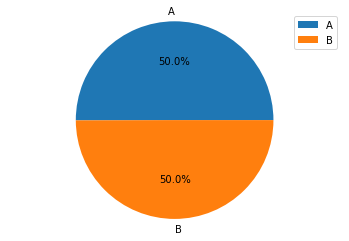

In [5]:
# 3
# Create a visualization of the proportion that each test group represents

tests['test_group'] = np.where(tests['fitness_test_date'].isnull(),"B", "A")
print(tests)
tests['test_number'] = np.where(tests['test_group'] == 'A',1, 2)

countofeachgroup = tests.groupby(['test_group']).visit_date.count().reset_index()
print(countofeachgroup)

countofeachgroupdf = pd.DataFrame(countofeachgroup)
print(countofeachgroupdf)

plt.pie(countofeachgroupdf.visit_date, labels=countofeachgroupdf.test_group, autopct='%0.1f%%')
plt.legend()
plt.axis('equal')
plt.show()

In [17]:
# 4
# Calculate application completion percentage
tests['completed_application'] = np.where(tests['application_date'].isnull(),"No Application", "Application")

countofapplication = tests.groupby(['completed_application', 'test_group']).visit_date.count().reset_index()

countofapplicationdf = pd.DataFrame(countofapplication)

countofapplication_pivot = countofapplicationdf.pivot(columns='completed_application',
         index='test_group').reset_index()

countofapplication_pivotdf = pd.DataFrame(countofapplication_pivot)

countofapplication_pivotdf.columns = ['test_group', 'application', 'no_application']

countofapplication_pivotdf['total'] = countofapplication_pivotdf['application'] + countofapplication_pivotdf['no_application']

countofapplication_pivotdf['% of application'] = (countofapplication_pivotdf['application'] / countofapplication_pivotdf['total'])*100
print(countofapplication_pivotdf)

countofapplication_pivotdf.to_csv(r"C:/Users/" + user + "/Downloads/countofapplication_pivot.csv")

  test_group  application  no_application  total  % of application
0          A          250            2254   2504          9.984026
1          B          325            2175   2500         13.000000


In [7]:
# 5
# Having calculated the difference in who turned in an application between groups, determine if this difference is statistically significant.
#Created contingency table. Calculate the p-value. 
contingency = [[250, 2254],
               [325, 2175]]
contingencyabtest = chi2_contingency(contingency)
pvalue = contingencyabtest[1]
print(pvalue)

#pvalue = 0.0009648 < 0.05
# Since the pvalue is less than 0.05, we reject the null hypothesis: There is a significant difference between the visitors in group A and group B that turned in an application.

0.0009647827600722304


In [16]:
# 6
# Of those who picked up an application, how many purchased a membership? Calculate purchase percentage of those who picked up an application
tests['is_member'] = np.where(tests['purchase_date'].isnull(),"Not Member", "Member")

tests2 = tests[tests['completed_application'] == 'Application']

just_apps = tests2.groupby(['is_member', 'test_group']).visit_date.count().reset_index()

just_appsdf = pd.DataFrame(just_apps)

just_apps_pivot = just_appsdf.pivot(columns='is_member',
         index='test_group').reset_index()

just_apps_pivotdf = pd.DataFrame(just_apps_pivot)

just_apps_pivotdf.columns = ['ab_test_group', 'member', 'not_member']

just_apps_pivotdf['total'] = just_apps_pivotdf['member'] + just_apps_pivotdf['not_member']

just_apps_pivotdf['%_of_purchases'] = (just_apps_pivotdf['member'] / just_apps_pivotdf['total'])*100
print(just_apps_pivotdf)

just_apps_pivotdf.to_csv(r"C:/Users/" + user + "/Downloads/just_apps_pivot.csv")

  ab_test_group  member  not_member  total  %_of_purchases
0             A     200          50    250       80.000000
1             B     250          75    325       76.923077


In [9]:
# 7
# Calculate the p-value
"""Calculate if the difference between the following groups is statistically significant:
The customers that picked up an application and took a fitness test.
The customers that did not take a fitness test and picked up an application."""
#Created contingency table
contingency2 = [[200, 50],
               [250, 75]]
contingencyabtest2 = chi2_contingency(contingency2)
pvalue2 = contingencyabtest2[1]
#print(pvalue2)
#pvalue is 0.4325 and since it's > 0.05, we can accept the null hypothesis: There isn't a significant difference in the purchase of memberships between visitors in group A and group B.

In [15]:
# 8
# Calculate percentage of ALL visitors who
# purchased memberships

all_visitors = tests.groupby(['is_member', 'test_group']).visit_date.count().reset_index()

all_visitorsdf = pd.DataFrame(all_visitors)

all_visitors_pivot = all_visitorsdf.pivot(columns='is_member',
         index='test_group').reset_index()

all_visitors_pivotdf = pd.DataFrame(all_visitors_pivot)

all_visitors_pivotdf.columns = ['ab_test_group', 'member', 'not_member']

all_visitors_pivotdf['total'] = all_visitors_pivotdf['member'] + all_visitors_pivotdf['not_member']

all_visitors_pivotdf['%_of_purchases'] = (all_visitors_pivotdf['member'] / all_visitors_pivotdf['total'])*100
print(all_visitors_pivotdf)

all_visitors_pivotdf.to_csv(r"C:/Users/" + user + "/Downloads/all_visitors_pivot.csv")

#print(percentofvisitorswhopurchased)
#8.993%

  ab_test_group  member  not_member  total  %_of_purchases
0             A     200        2304   2504         7.98722
1             B     250        2250   2500        10.00000


In [11]:
# 9
# Calculate the p-value
"""Determine if there is a significant difference in memberships between Group A and Group B."""
#Created contingency table
contingency3 = [[200, 2304],
               [250, 2250]]
contingencyabtest3 = chi2_contingency(contingency3)
pvalue3 = contingencyabtest3[1]
print(pvalue3)

#pvalue is 0.0147, which is < 0.05. The difference in memberships between group A and group B is significant. Given this, we can reject the null hypothesis: There is a significant difference in the purchase of memberships between visitors in group A and group B.

0.014724114645783203


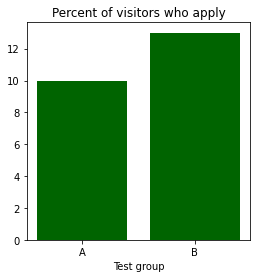

In [29]:
# 10
# Create visualizations
#Percent of visitors who apply
plt.figure(figsize=(4,4))
ax = plt.subplot()
plt.bar(range(len(countofapplication_pivotdf['% of application'])),countofapplication_pivotdf['% of application'].values, color='darkgreen')
ax.set_xticks(range(len(countofapplication_pivotdf['test_group'])))
ax.set_xticklabels(countofapplication_pivotdf['test_group'].values)
plt.xlabel('Test group')
plt.title('Percent of visitors who apply')
plt.show()

No handles with labels found to put in legend.


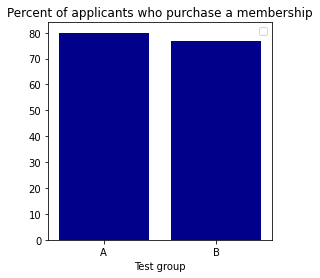

In [30]:
#Percent of applicants who purchase a membership
plt.figure(figsize=(4,4))
ax = plt.subplot()
plt.bar(range(len(just_apps_pivotdf['%_of_purchases'])),just_apps_pivotdf['%_of_purchases'].values, color='darkblue')
ax.set_xticks(range(len(just_apps_pivotdf['ab_test_group'])))
ax.set_xticklabels(just_apps_pivotdf['ab_test_group'].values)
plt.legend()
plt.xlabel('Test group')
plt.title('Percent of applicants who purchase a membership')
plt.show()

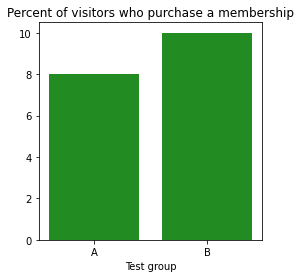

In [31]:
#Percent of visitors who purchase a membership
plt.figure(figsize=(4,4))
ax = plt.subplot()
plt.bar(range(len(all_visitors_pivotdf['%_of_purchases'])),all_visitors_pivotdf['%_of_purchases'].values, color='forestgreen')
ax.set_xticks(range(len(all_visitors_pivotdf['ab_test_group'])))
ax.set_xticklabels(all_visitors_pivotdf['ab_test_group'].values)
plt.xlabel('Test group')
plt.title('Percent of visitors who purchase a membership')
plt.show()